# Necessary Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# download data files, pass the desired file path in the next cell

In [2]:
!pip install gdown
!gdown --id 1JC5d2M5h6Bx-MweEBdeYQHcLXpRlsrbk
!gdown --id 1MHIbS1V26CDGW7mzStReHQ_Ys5YtaoaR

Downloading...
From: https://drive.google.com/uc?id=1JC5d2M5h6Bx-MweEBdeYQHcLXpRlsrbk
To: /content/data1.txt
100% 1.36k/1.36k [00:00<00:00, 2.38MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MHIbS1V26CDGW7mzStReHQ_Ys5YtaoaR
To: /content/data2.txt
100% 657/657 [00:00<00:00, 1.81MB/s]


Change "data1.txt" for data1 and "data2.txt" for data2 

In [31]:
data_path = '/content/data1.txt'

# Normalizing Data
*Run this cell first*

In [32]:
#normalising data (works for both datasets)
data = pd.read_csv(data_path,header=None,dtype=np.float32) 
features = data.shape[1] - 1    #number of features is 1 less than total number of columns 
  
for i in range(features):
  max_val = data[i].max()
  mean = data[i].mean()
  for j in range(len(data[i])):
    row_val = data[i][j] 
    new_val = (row_val-mean)/max_val
    data[i][j]  = new_val 
X = data.iloc[:,:features]       #train set (consist of featuers only)
X = X.T
y = data.iloc[:,-1]              #test set (consists of last column only)
y = np.array([y])                #converting y into nd array for future use 

# Generalized code working on both datasets

**Code Breakdown**
1.   Initializations
2.   Linear line fit
3.   Cost function
4.   Gradient decent
5.   Update rule
6.   Auto stop









```
for the sake of simplicity and easier readibility, new variables are used instead of variables defined in lectures. 
```


```
bias = Theta0 
weights = Theta1
z = h(x) 
```




In [37]:
num_features = X.shape[0]
weights = np.random.randn(1,num_features)
bias = 0
itterations = 1000000
alpha  = 0.2
costfunc_values = []
k = 0
m = y.shape[1]
for i in range(1, itterations+1):
  #line equation  
  z = np.dot(weights,X) + bias

  #cost function 
  j = (1/(2*m)) * (np.sum(np.square(z-y)))
  #append values in list for later plotting 
  costfunc_values.append(j)
  #keeping count of itteration 
  k += 1
  
  #gradient decent 
  dw = 1/m * np.dot(z-y,X.T)
  db = 1/m * np.sum(z-y)

  #update rule
  weights = weights - alpha*dw
  bias = bias - alpha*db

  #check if change in J is stagnant 
  if i%2== 0:
    if abs(j-costfunc_values[-2])<0.001:
      if abs(j-costfunc_values[-3])<0.001:
        break 
print('itteration number:',k)
print('cost is ',costfunc_values[-1])

itteration number: 700
cost is  4.542524599531569


# Run these cells for 
# **Cost vs Itterations Plot**

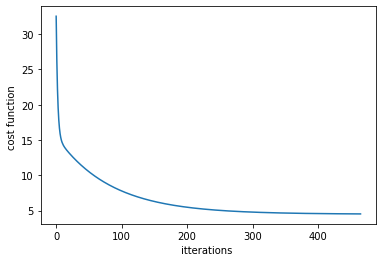

In [34]:
plt.plot(costfunc_values)
plt.ylabel('cost function ')
plt.xlabel('itterations ')
plt.show()

# **line of best fit plot for singlevariate regression**

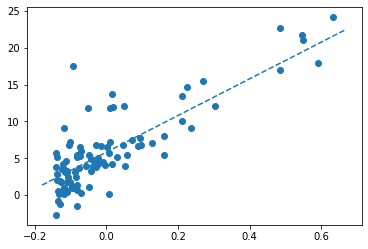

In [35]:
plt.scatter(X, y)
axis = plt.gca()
xaxis = np.array(axis.get_xlim())
yaxis = bias + weights[0]*xaxis
plt.plot(xaxis, yaxis, '--')

# **3d Scatter plot for multivariate linear regression**

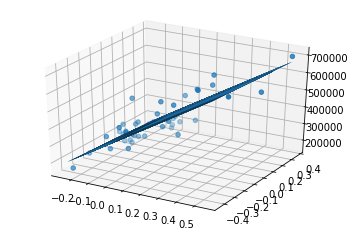

In [22]:
fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.scatter(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2])
a = np.array(data.iloc[:,0])
b = np.array(data.iloc[:,1])
A, B = np.meshgrid(a, b)
C = bias + weights[0,0]*A + weights[0,1]*B
ax.plot_surface(A, B, C) 